In [2]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore")


In [3]:
movie = pd.read_csv('E:\COLLEGE\Web Mining\FinalProject\movie_preprocessing5.csv')
# movie=movie1[:5000]

## Weight Rating


### 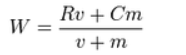

- W: weight rating
- R: average score for the movie
- v: number of review_count for the movie
- m: minimum review_count required to be listed
- C: the mean score across the whole dataset

In [4]:
C = movie['Score'].mean()
m =  movie['Review count'].quantile(0.9)
movie_list = movie.copy().loc[movie['Review count']>=m]

In [5]:
# Defining a function
def weighted_rating(x,m=m,C=C):
    v=x['Review count']
    R=x['Score']
    return ((R*v+C*m)/(v+m))

In [6]:
movie_list['WR_score']=movie_list.apply(weighted_rating,axis=1)
movie_list.head()

# Sort the movies based on their WR_score
movie_list = movie_list.sort_values('WR_score',ascending=False)
movie_list.head(10)

,Title,Score,Review count,Genre,Original Language,Runtime,Rating,Director,Cast,Synopsis,WR_score
24608,The Godfather,97.5,250149,"Drama, Crime",English,177.0,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",Widely regarded as one of the greatest films o...,94.472191
27545,Schindler's List,97.5,250132,"Drama, History",English,195.0,R,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",Businessman Oskar Schindler (Liam Neeson) arri...,94.472005
16084,Casablanca,97.0,250136,Drama,English,102.0,PG,Michael Curtiz,"Humphrey Bogart, Ingrid Bergman, Paul Henreid,...","Rick Blaine (Humphrey Bogart), who owns a nigh...",94.017845
12290,Spirited Away,96.5,250195,"Adventure, Fantasy, Animation",Japanese,125.0,PG,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Jason Marsde...",10-year-old Chihiro (Daveigh Chase) moves with...,93.564271
23108,"The Godfather, Part II",96.5,250123,"Drama, Crime",English,200.0,R,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","The compelling sequel to ""The Godfather,"" cont...",93.563504
30835,Goodfellas,96.5,250107,"Drama, Crime",English,146.0,R,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",A young man grows up in the mob and works very...,93.563333
17520,Monty Python and the Holy Grail,96.5,250082,Comedy,English,90.0,PG,"Terry Gilliam, Terry Jones","Graham Chapman, John Cleese, Terry Gilliam, Er...",A comedic send-up of the grim circumstances of...,93.563066
20668,Alien,96.0,250132,"Horror, Sci-fi",English,117.0,R,Ridley Scott,"Tom Skerritt, Sigourney Weaver, John Hurt, Ver...","In deep space, the crew of the commercial star...",93.109397
28806,Apocalypse Now,96.0,250098,"Drama, War",English,153.0,R,Francis Ford Coppola,"Marlon Brando, Martin Sheen, Robert Duvall, Fr...","In Vietnam in 1970, Captain Willard (Martin Sh...",93.109040
23652,Toy Story,96.0,250096,"Comedy, Adventure, Kids & family, Fantasy, Ani...",English,80.0,G,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Woody (Tom Hanks), a good-hearted cowboy doll ...",93.109019


## Cosine Similarity

In [7]:
movie['General'] = movie['Genre'] + ' '  + movie['Original Language']+ ' ' + movie['Rating']+' '+ movie['Director'] + ' ' + movie['Cast']+' ' + movie['Synopsis']

In [8]:
# for i in movie['General'][:10]:
#   print(i)

### Preprocessing

In [9]:
# # Preprocessing Review column
# import pandas as pd
# from nltk.corpus import stopwords
# # from textblob import TextBlob
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import spacy
# nlp = spacy.load("en_core_web_sm")
# stop_words = set(stopwords.words('english'))
# import re

# def clean_review(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     text = text.strip()
#     text = text.replace('\n', ' ')
#     text = re.sub(r'[^\w\s]', '', text)
#     #tokenizing
    
#     # lemmatization
#     doc = nlp(text)
#     text = " ".join([token.lemma_ for token in doc])
#     return text

In [10]:
tfidf= TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['General'])
tfidf_matrix.shape

(32462, 143425)

In [11]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movie['General'])
count_matrix.shape

(32462, 143425)

In [12]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Reduce the dimensions of the TF-IDF matrix using SVD
svd = TruncatedSVD(n_components=100)
svd_matrix = svd.fit_transform(tfidf_matrix)
# Calculate cosine similarity on the reduced matrix
cosine_sim = cosine_similarity(svd_matrix, svd_matrix)


In [13]:
# from sklearn.decomposition import PCA
# from sklearn.metrics.pairwise import cosine_similarity

# # Reduce the dimensions of the TF-IDF matrix using PCA
# pca = PCA(n_components=100)
# pca_matrix = pca.fit_transform(tfidf_matrix.toarray())

# # Calculate cosine similarity on the reduced matrix
# cosine_sim = cosine_similarity(pca_matrix, pca_matrix)


## Recommend Movies

In [14]:
movie = movie.reset_index()
indices = pd.Series(movie.index, index=movie['Title'])

In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # index of the movie that matches the title
    # idx = indices[title]
    idx = movie[movie["Title"] == title].index[0]

    # pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Scores of 10 most similar movies
    sim_scores = sim_scores[:30]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Combine Cosine similarity and weight score
    movie_pred = movie.iloc[movie_indices][['Title', 'Genre', 'Score', 'Review count', 'Original Language']]
    C = movie['Review count'].mean()
    m = movie['Review count'].quantile(0.40)
    t = movie['Score'].quantile(0.5)
    qualified = movie_pred[(movie_pred['Review count'] >= m) & (movie_pred['Score'] >= t)]
    qualified['WR_score'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('WR_score', ascending=False).head(15)
    return qualified

# Recommendation Evaluation

In [35]:
movieName = input("Input a movie name of your liking: ")
import difflib

print("The movie of your liking: ", movieName)

allTitleList = movie['Title'].tolist()

findCloseMatches = difflib.get_close_matches(movieName, allTitleList)

if not findCloseMatches:
    print("Sorry, we could not find any close matches to the movie title. Please try again with a different movie title.")
else:
    closeMatch = findCloseMatches[0]
    
    
recommendations = get_recommendations(closeMatch)
recommendations[['Title', 'Genre']]

The movie of your liking:  The Haunting


,Title,Genre


In [31]:
def calculate_diversity(recommendations):
    # Get the genres of recommended movies
    genres = recommendations['Genre'].apply(lambda x: x.split(','))

    # Flatten the list of genres
    all_genres = [genre.strip() for sublist in genres for genre in sublist]

    # Calculate the diversity score as the ratio of unique genres to total genres
    if len(all_genres) == 0:
        return "No diversity score calculated."
    else:
        diversity_score = len(set(all_genres)) / len(all_genres)

    explanation = f"The diversity score is {diversity_score:.2f}."
    if diversity_score >= 0.7:
        explanation += " The recommendations show a HIGH level of genre diversity."
    elif diversity_score >= 0.4:
        explanation += " The recommendations demonstrate a MODERATE level of genre diversity."
    else:
        explanation += " The recommendations have a relatively LOW genre diversity."

    return explanation

explanation = calculate_diversity(recommendations)
print("Explanation:", explanation)

Explanation: The diversity score is 0.39. The recommendations have a relatively LOW genre diversity.


In [28]:
n = 100
randomMovies = movie.sample(n)

for title in randomMovies['Title']:
    print(title)   
    print('--') 
    rec = get_recommendations(title)
    print(rec[['Title', 'Genre']])
    print('--')
    explanation = calculate_diversity(rec)
    print(explanation)
    print('------------------------------------------------------------------------------------------------------')

Shadow Conspiracy
--
                                    Title                     Genre
6503                     Moonrise Kingdom    Drama, Comedy, Romance
23601  Butch Cassidy and the Sundance Kid           Action, Western
23103                           Tombstone           Action, Western
12199              Miracle on 34th Street    Drama, Comedy, Holiday
23009                           The Piano                     Drama
1207                           Mean Creek                     Drama
23410     Confessions of a Dangerous Mind  Drama, Comedy, Biography
27949                  A Day at the Races                    Comedy
30761                           Dead Calm        Mystery & thriller
6851                            Gunga Din                 Adventure
20637                   Woman of the Year                    Comedy
26716                    California Split             Drama, Comedy
22570                           Fail Safe        Mystery & thriller
31855                 They 

In [34]:
n = 1000
randomMovies = movie.sample(n)

lowcount, modcount, highcount = 0, 0, 0
for title in randomMovies['Title']:
    rec = get_recommendations(title)
    explanation = calculate_diversity(rec)
    if 'LOW' in explanation:
        lowcount += 1
    elif 'MODERATE' in explanation:
        modcount += 1
    elif 'HIGH' in explanation:
        highcount += 1
    else:
        print(title)

print(f'low: {lowcount}, moderate: {modcount}, high: {highcount}')

May the Devil Take You: Chapter Two
The Free Fall
Plan B
low: 441, moderate: 473, high: 83


The Haunting
May the Devil Take You: Chapter Two
The Free Fall
Plan B